<h1><b>Electricity Consumption Data Analysis</b></h1>

<h2><b>Objective</b></h2>

<h4>To analyze and compare electricity consumption patterns in 2019 and 2020 using Python, identify key trends, and visualize monthly consumption variations, with a focus on understanding the impact of external factors such as seasonal changes and the COVID-19 pandemic.</h4>

<h3><b>Importing Libraries</b></h3>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b>Data Reading<b></h3>

In [4]:
df=pd.read_csv("long_data_.csv")

In [6]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [7]:
df.columns

Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object')

<h3><b>Data Cleaning</b></h3>

In [24]:
df.isnull().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
Month        0
Days         0
Year         0
dtype: int64

In [ ]:
#No null values in the data

In [22]:
#States
df["States"].value_counts().to_frame()

,count
States,
Punjab,503
Haryana,503
Rajasthan,503
Delhi,503
UP,503
Uttarakhand,503
HP,503
J&K,503
Chandigarh,503


In [18]:
#changing dates to date time format
df["Dates"]=pd.to_datetime(df["Dates"],dayfirst=True)

In [19]:
#create date related columns

df["Month"]=df["Dates"].dt.month
df["Days"]=df["Dates"].dt.day
df["Year"]=df["Dates"].dt.year

In [20]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage,Month,Days,Year
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,1,2,2019
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,1,2,2019
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,1,2,2019
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,1,2,2019
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,1,2,2019


<h3><b>Data Visualization</b></h3>

<Axes: xlabel='Regions', ylabel='Usage'>

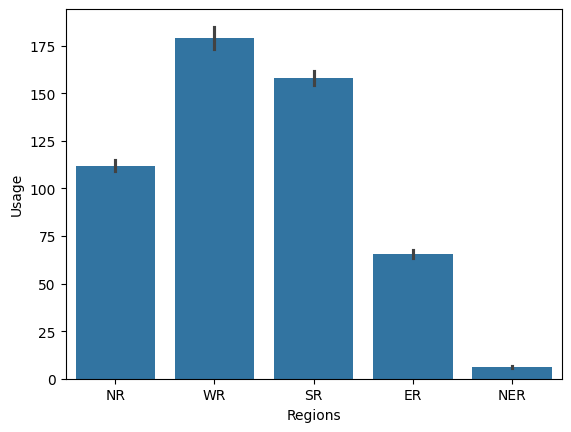

In [30]:
sns.barplot(data = df, x="Regions", y= "Usage")

Text(0.5, 1.0, "Month's total power Usage trends for 2019 and 2020")

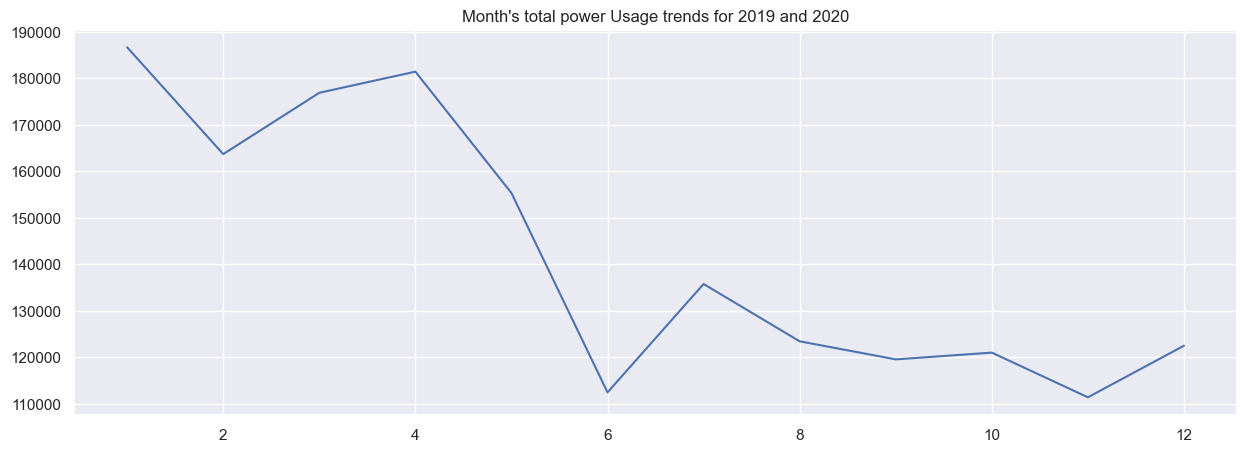

In [35]:
mo=df.groupby("Month")["Usage"].sum().reset_index()
plt.plot(mo["Month"],mo["Usage"],)
plt.title("Month's total power Usage trends for 2019 and 2020")

Text(0.5, 1.0, 'Regions annual Usage pie chart')

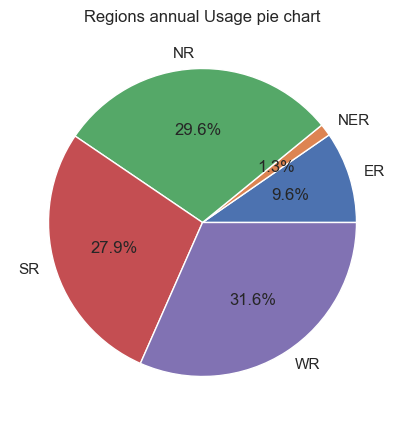

In [39]:
regions_annual_usage=df.groupby("Regions")["Usage"].sum().reset_index()
plt.pie(labels=regions_annual_usage["Regions"],x=regions_annual_usage["Usage"],autopct='%1.1f%%')#to display percentages on the pie chart with 1 decimal place and a percent sign.
plt.title("Regions annual Usage pie chart")


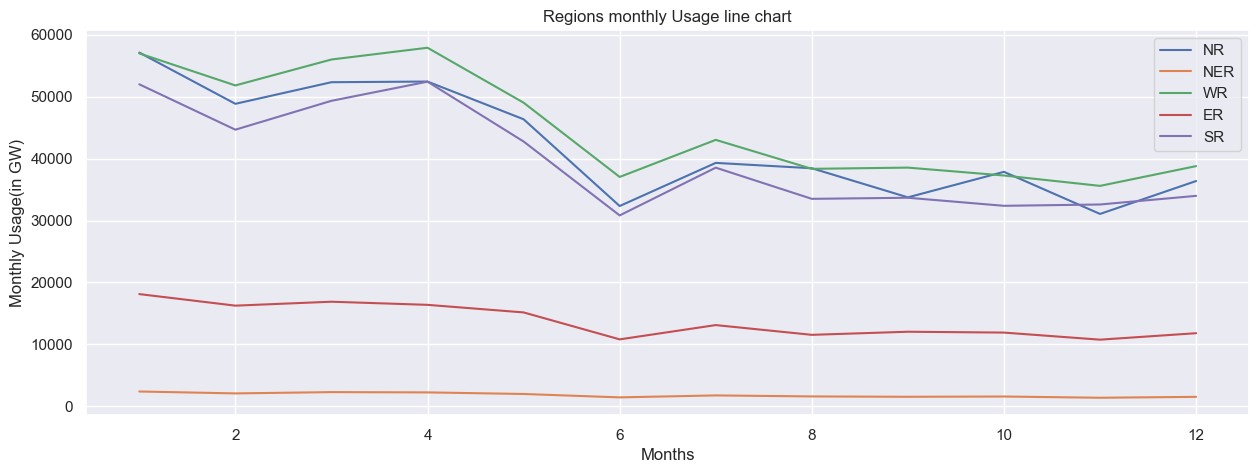

In [41]:
regions_monthly_usage=df.groupby(["Regions","Month"])["Usage"].sum().reset_index()
plt.plot(regions_monthly_usage["Month"].loc[regions_monthly_usage["Regions"]=="NR"],regions_monthly_usage["Usage"].loc[regions_monthly_usage["Regions"]=="NR"])
plt.plot(regions_monthly_usage["Month"].loc[regions_monthly_usage["Regions"]=="NER"],regions_monthly_usage["Usage"].loc[regions_monthly_usage["Regions"]=="NER"])
plt.plot(regions_monthly_usage["Month"].loc[regions_monthly_usage["Regions"]=="WR"],regions_monthly_usage["Usage"].loc[regions_monthly_usage["Regions"]=="WR"])
plt.plot(regions_monthly_usage["Month"].loc[regions_monthly_usage["Regions"]=="ER"],regions_monthly_usage["Usage"].loc[regions_monthly_usage["Regions"]=="ER"])
plt.plot(regions_monthly_usage["Month"].loc[regions_monthly_usage["Regions"]=="SR"],regions_monthly_usage["Usage"].loc[regions_monthly_usage["Regions"]=="SR"])
plt.title("Regions monthly Usage line chart")
plt.xlabel("Months")
plt.ylabel("Monthly Usage(in GW)")
plt.legend(["NR","NER","WR","ER","SR"])
plt.show()

In [10]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')
df['New_Date'] = df['Dates'].dt.date

In [11]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage,New_Date
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019-01-02
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019-01-02
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019-01-02
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019-01-02
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019-01-02


In [13]:
df['year'] = pd.DatetimeIndex(df['New_Date']).year
df.head()

,States,Regions,latitude,longitude,Dates,Usage,New_Date,year
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019-01-02,2019
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019-01-02,2019
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019-01-02,2019
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019-01-02,2019
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019-01-02,2019


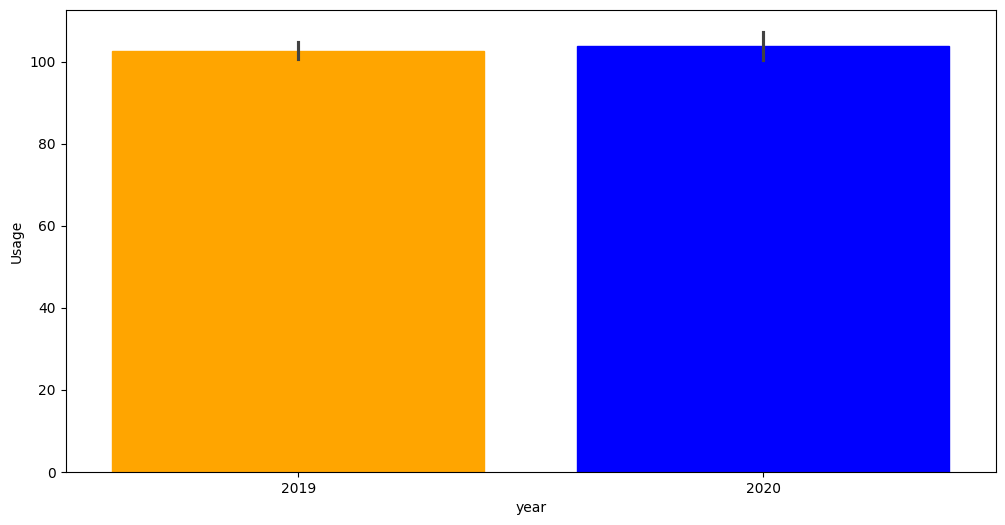

In [30]:
plt.figure(figsize = (12,6))
ax=sns.barplot(x = 'year',y='Usage',data=df)
bars = ax.patches
colors = ['orange', 'blue']  

for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])


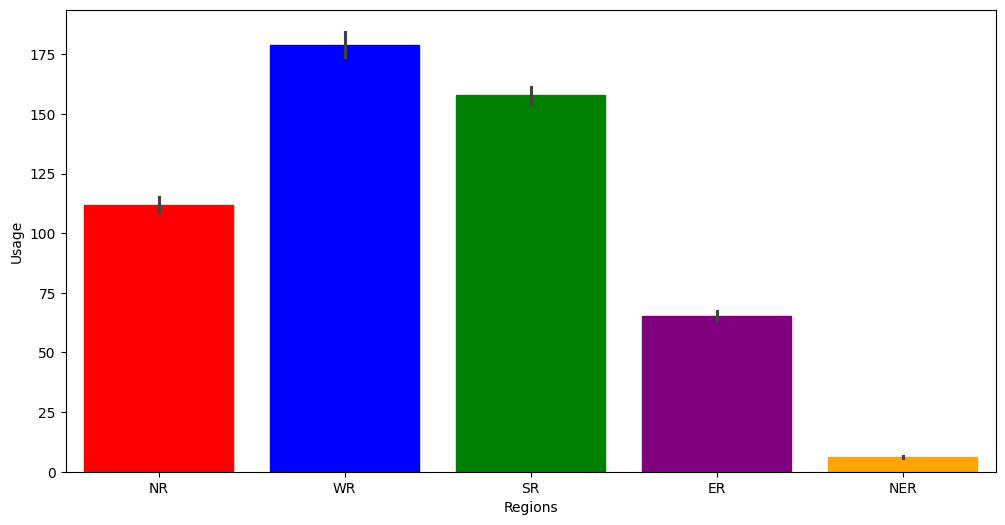

In [25]:
plt.figure(figsize = (12,6))
ax=sns.barplot(x = 'Regions',y='Usage',data=df)
bars = ax.patches
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'yellow']
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])

<Axes: xlabel='Usage', ylabel='Count'>

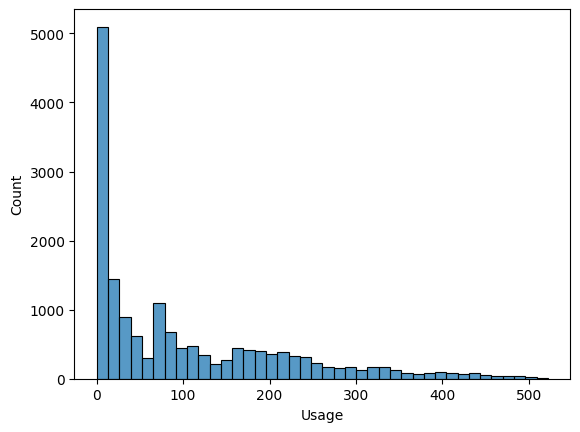

In [22]:
     sns.histplot(df['Usage'])

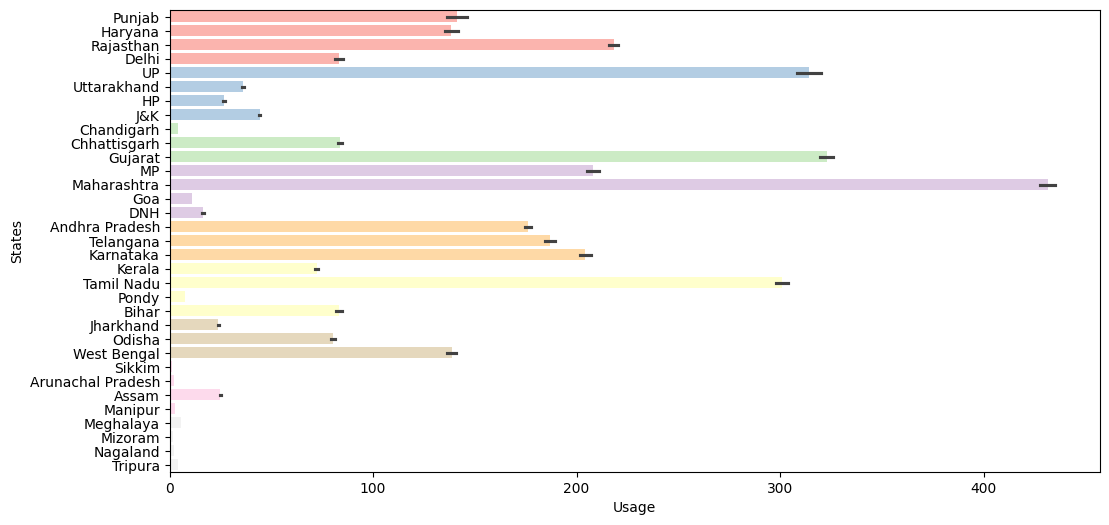

In [40]:
plt.figure(figsize = (12,6))
ax=sns.barplot(x = 'Usage',y='States',data=df)
bars = ax.patches
colors = plt.cm.Pastel1(np.linspace(0, 1, len(bars)))  

for i, bar in enumerate(bars):
    bar.set_facecolor(colors[i])  # Apply


<h3><b>Conclusion</b></h3>

<h4>The analysis of electricity consumption data provides valuable insights into usage patterns, trends, and potential areas for improvement.This analysis underlines the need for continued monitoring of consumption trends, investment in energy-efficient infrastructure, and the promotion of sustainable practices in the electricity sector to ensure that demand is met responsibly.The most significant factor influencing electricity consumption during 2019 and 2020 was the COVID-19 pandemic. With nationwide lockdowns and restrictions on businesses, factories, and schools, there was a notable shift in consumption patterns. Residential electricity consumption saw an increase due to more people working from home, while commercial and industrial consumption declined sharply as many sectors temporarily shut down or operated at reduced capacity.</h4>